# 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')

# 데이터 구조 파악하기

In [3]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
print('데이터 Null 값 유무 : {}'.format(data.isnull().values.any()))

데이터 Null 값 유무 : True


In [5]:
print('열의 Null 값 상황')
print('--------------------')
print(data.isnull().sum())

열의 Null 값 상황
--------------------
Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64


In [6]:
print("Sentence # 열에 있는 데이터 개수 : {}".format(data['Sentence #'].nunique()))
print('Word 열에 있는 데이터 개수 : {}'.format(data.Word.nunique()))
print('Tag 열에 있는 데이터 개수 : {}'.format(data.Tag.nunique()))

Sentence # 열에 있는 데이터 개수 : 47959
Word 열에 있는 데이터 개수 : 35178
Tag 열에 있는 데이터 개수 : 17


In [7]:
print("Tag 열에 있는 태깅 현황")
print("--------------------------")
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열에 있는 태깅 현황
--------------------------
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


# 데이터 전처리

In [8]:
data = data.fillna(method='ffill')
data.tail()

,Sentence #,Word,POS,Tag
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O
1048574,Sentence: 47959,attack,NN,O


In [9]:
print("데이터 Null 값 유무 : {}".format(data.isnull().values.any()))

데이터 Null 값 유무 : False


In [10]:
data['Word'] = data['Word'].str.lower()

In [11]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [12]:
func = lambda temp: [(w, t) for w, t in zip(temp['Word'].values.tolist(),
                                            temp['Tag'].values.tolist())]
tagged_sentences = [f for f in data.groupby('Sentence #').apply(func)]

In [13]:
tagged_sentences[0]

[('thousands', 'O'),
 ('of', 'O'),
 ('demonstrators', 'O'),
 ('have', 'O'),
 ('marched', 'O'),
 ('through', 'O'),
 ('london', 'B-geo'),
 ('to', 'O'),
 ('protest', 'O'),
 ('the', 'O'),
 ('war', 'O'),
 ('in', 'O'),
 ('iraq', 'B-geo'),
 ('and', 'O'),
 ('demand', 'O'),
 ('the', 'O'),
 ('withdrawal', 'O'),
 ('of', 'O'),
 ('british', 'B-gpe'),
 ('troops', 'O'),
 ('from', 'O'),
 ('that', 'O'),
 ('country', 'O'),
 ('.', 'O')]

In [14]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences:
  sentence, ner_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(ner_info))

In [15]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


# 임베딩 작업

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

src_tokenizer = Tokenizer(oov_token='OOV')
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

In [17]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print("단어 사전 : {}".format(vocab_size))
print("레이블 : {}".format(tag_size))

단어 사전 : 31819
레이블 : 18


In [18]:
print("레이블 및 정수 매칭")
print(tar_tokenizer.word_index)

레이블 및 정수 매칭
{'O': 1, 'B-geo': 2, 'B-tim': 3, 'B-org': 4, 'I-per': 5, 'B-per': 6, 'I-org': 7, 'B-gpe': 8, 'I-geo': 9, 'I-tim': 10, 'B-art': 11, 'B-eve': 12, 'I-art': 13, 'I-eve': 14, 'B-nat': 15, 'I-gpe': 16, 'I-nat': 17}


In [19]:
x_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [20]:
print(x_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [21]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

index_to_ner[0] = 'PAD'
print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [22]:
decoded = []

for index in x_data[0]:
  decoded.append(index_to_word[index].replace('PAD', 'O'))

print("기존 문장 : {}".format(sentences[0]))
print("디코딩 문장 : {}".format(decoded))

기존 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


# 패딩 작업

가장 긴 문장 : 104
평군 문장 길이 : 21.863988


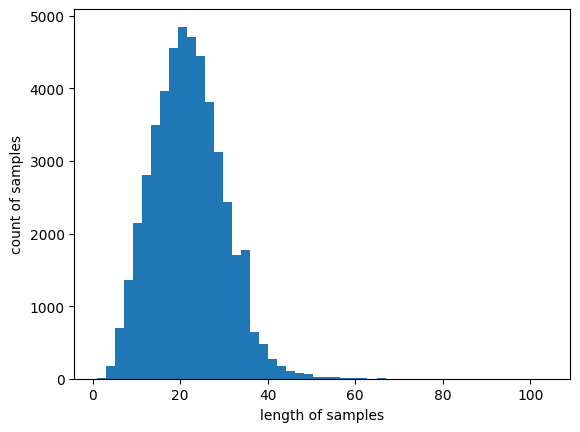

In [23]:
import matplotlib.pyplot as plt

print("가장 긴 문장 : %d" % max(len(l) for l in sentences))
print("평군 문장 길이 : %f" % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('count of samples')
plt.show()

In [24]:
max_len = 70

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_data = pad_sequences(x_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [25]:
print(x_data[0])
print(y_data[0])

[ 254    6  967   16 1795  238  468    7  523    2  129    5   61    9
  571    2  833    6  186   90   22   15   56    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
[1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 8 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# 훈련 데이터 만들기

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_int, y_test_int = train_test_split(x_data, y_data, test_size=.2)

In [27]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

In [28]:
print("훈련 문장 데이터 구조 : {}".format(x_train.shape))
print("훈련 레이블(정수) 구조 : {}".format(y_train_int.shape))
print("훈련 레이블(원핫) 구조 : {}".format(y_train.shape))
print("테스트 문장 데이터 구조 : {}".format(x_test.shape))
print("테스트 레이블(정수) 구조 : {}".format(y_test.shape))
print("테스트 레이블(원핫) 구조 : {}".format(y_test_int.shape))

훈련 문장 데이터 구조 : (38367, 70)
훈련 레이블(정수) 구조 : (38367, 70)
훈련 레이블(원핫) 구조 : (38367, 70, 18)
테스트 문장 데이터 구조 : (9592, 70)
테스트 레이블(정수) 구조 : (9592, 70, 18)
테스트 레이블(원핫) 구조 : (9592, 70)


# 모델 생성 및 훈련

In [29]:
!pip install keras_crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.0 MB/s eta 0:00:00


In [31]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import Model
from keras_crf import CRFModel

embedding_dim = 128
hidden_units = 64
drop_ratio = 0.3

sequences_input = Input(shape=(max_len,), dtype=tf.int32, name='sequences_input')

model_embedding = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len)(sequences_input)

model_lstm = Bidirectional(LSTM(hidden_units, return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(drop_ratio))(model_lstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = Model(inputs=sequences_input, outputs=model_dense)
model = CRFModel(base, tag_size)
model.compile(optimizer=Adam(0.001), metrics='accuracy')

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy',
                     mode='max', verbose=1, save_best_only=True,
                     save_weights_only=True)

model.fit(x_train, y_train_int, batch_size=128, epochs=15,
          validation_split=0.1, callbacks=[mc, es])

Epoch 1/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9146 - loss: 29.2825
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.96364, saving model to bilstm_crf/cp.ckpt
270/270 [==============================] - 82s 274ms/step - decode_sequence_accuracy: 0.9146 - loss: 29.2076 - val_decode_sequence_accuracy: 0.9636 - val_loss: 8.8442
Epoch 2/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9716 - loss: 6.8687
Epoch 2: val_decode_sequence_accuracy improved from 0.96364 to 0.97944, saving model to bilstm_crf/cp.ckpt
270/270 [==============================] - 72s 266ms/step - decode_sequence_accuracy: 0.9716 - loss: 6.8622 - val_decode_sequence_accuracy: 0.9794 - val_loss: 4.9045
Epoch 3/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9817 - loss: 3.7936
Epoch 3: val_decode_sequence_accuracy improved from 0.97944 to 0.98294, saving model to bilstm_crf/cp.ckpt
270/270 [===

# 모델 성능 측정

In [34]:
import numpy as np

model.load_weights('bilstm_crf/cp.ckpt')

i = 15
y_predicted = model.predict(np.array([x_test[i]]))[0]
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print("-"*32)

for word, tag, pred in zip(x_test[i], labels, y_predicted[0]):
  if word != 0:
    print("{:17}: {:7} {}".format(index_to_word[word],
                                  index_to_ner[tag],
                                  index_to_ner[pred]
                                  ))

1/1 [==============================] - 1s 1s/step
단어             |실제값  |예측값
--------------------------------
the              : O       O
dutch            : B-gpe   B-gpe
government       : O       O
rejects          : O       O
the              : O       O
claim            : O       O
,                : O       O
saying           : O       O
there            : O       O
is               : O       O
no               : O       O
indication       : O       O
that             : O       O
van              : B-per   B-per
uhm              : I-per   I-per
was              : O       O
personally       : O       O
targeted         : O       O
.                : O       O


  # F1_score로 성능 측정

In [35]:
y_predicted = model.predict(x_test)[0]

300/300 [==============================] - 8s 28ms/step


In [36]:
def sequences_to_tag_for_crf(sequences):
  result = []
  for sequence in sequences:
    word_sequence = []
    for pred_index in sequence:
      word_sequence.append(index_to_ner[pred_index].replace('PAD','O'))
    result.append(word_sequence)
  return result

def sequences_to_tag(sequences):
  result = []
  for sequence in sequences:
    word_sequence = []
    for pred in sequence:
      pred_index = np.argmax(pred)
      word_sequence.append(index_to_ner[pred_index].replace('PAD','O'))
    result.append(word_sequence)
  return result

pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

In [37]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=326758633d2baf15927710fef24bf39ab46a9a4b132b327578b95b527a489961
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [39]:
from seqeval.metrics import f1_score, classification_report

print("점수 : {}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

점수 : 0.7967609489051095


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.00      0.00      0.00        90
         eve       0.50      0.01      0.03        67
         geo       0.83      0.85      0.84      7602
         gpe       0.93      0.93      0.93      3268
         nat       0.25      0.13      0.17        47
         org       0.69      0.56      0.62      3956
         per       0.74      0.71      0.73      3371
         tim       0.85      0.83      0.84      4034

   micro avg       0.82      0.78      0.80     22435
   macro avg       0.60      0.50      0.52     22435
weighted avg       0.81      0.78      0.79     22435



노션<br>
https://www.notion.so/12-06-BiLSTM-CRF-c162a7e653cd4bec8be33340d1cac58d